# Sample

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rc('font', family=['IPAexGothic'])
%matplotlib inline

import sembei as sb

## Setting

In [2]:
with open('./jawiki-latest-pages-articles_text_10M.txt',
          mode='r', encoding='utf-8', errors='ignore') as f:
    corpus_str = ''.join(line.replace('\n', ' ') for line in f.readlines())

len(corpus_str)

3952451

In [3]:
corpus_str[100000:100100]

'別については、平安時代末期にはすでにいずれもの音となり発音上の区別が無くなっていたことにより、相当な表記の揺れがあり、格助詞の「を」を除き前例による基準を見出すことができなかった。そこで『下官集』では'

In [4]:
%%time
n_extract_tuple = [(1, 3000), (2, 100000), (3, 100000), (4, 100000), (5, 100000),
                   (6, 70000), (7, 10000), (8, 10000)]

vocabulary = sb.utils.ngram.extract_topn_ngram_lossycounting(
    corpus_str, width_ngram=len(n_extract_tuple), n_extract_tuple=n_extract_tuple,
    epsilon=1e-7, support_threshold=1e-7, n_processes=20)
    
size_vocabulary = len(vocabulary)

min count   : ('耀', 5) 0
# of 1-gram : 4295
Coverage    : 0.9993060002514895

min count   : ('・決', 2) 0
# of 2-gram : 208807
Coverage    : 0.9672782787186989

min count   : ('沖縄タ', 5) 0
# of 3-gram : 930381
Coverage    : 0.6883371862168564

min count   : ('Guid', 5) 0
# of 4-gram : 1738573
Coverage    : 0.47033549562031257

min count   : ('ログ） *', 4) 0
# of 5-gram : 2355014
Coverage    : 0.33733119019059316

min count   : ('公表を開始 *', 13) 0
# of 7-gram : 3095326
Coverage    : 0.08868623545238132

min count   : ('イムレンジャ', 4) 0
# of 6-gram : 2793533
Coverage    : 0.22495332642960025

min count   : ('1960年代から', 10) 0
# of 8-gram : 3304594
Coverage    : 0.0692668928722962

CPU times: user 225 ms, sys: 129 ms, total: 354 ms
Wall time: 4.92 s


## Calculate

In [5]:
sembei = sb.embed.OSCCASembei(corpus_str, vocabulary, dim=200, n_iter_rsvd=6)

In [6]:
%%time
sembei.construct_cooccurrence_matrix(n_cores=4, n_chunk=20)

CPU times: user 7.83 s, sys: 2.85 s, total: 10.7 s
Wall time: 34.2 s


In [7]:
%%time
sembei.compute()

CPU times: user 6min 37s, sys: 30.5 s, total: 7min 7s
Wall time: 3min 8s


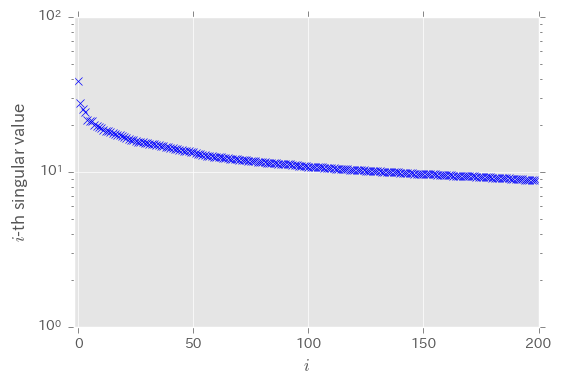

In [8]:
plt.plot(sembei.S_diag, 'bx')
plt.xlim(-2, )
plt.yscale('log')
plt.xlabel('$i$')
plt.ylabel('$i$-th singular value')
plt.show()

## Check

In [9]:
vectors = sembei.get_vectors(gamma=1e-6)
vectors.sample(n=10)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
基づいている,0.054704,-0.067880,-0.087566,0.043233,0.051782,0.087938,0.111173,0.072952,-0.075456,-0.057049,...,-0.044341,-0.006559,0.067202,0.084328,-0.030647,-0.096792,0.034366,0.023641,-0.001023,-0.073348
正三,0.043821,0.023388,0.010221,-0.025609,0.079967,-0.006057,0.045861,-0.002328,0.056907,-0.069806,...,0.016648,0.069813,-0.013927,-0.040154,-0.022516,-0.028196,-0.109250,0.031436,-0.069478,-0.006784
0年6月）,0.062161,0.122454,0.013084,0.048662,0.152097,-0.070306,0.154414,-0.040044,0.067062,0.052408,...,0.022715,0.038211,-0.040465,-0.022718,-0.078430,0.037456,0.029735,0.034036,-0.035126,0.140282
波は,0.143882,-0.033923,0.025305,0.165303,-0.036381,-0.055022,-0.114447,0.069635,-0.034288,0.131976,...,-0.013569,-0.063530,-0.204117,-0.109950,-0.047632,0.028607,0.039941,0.065850,0.008453,0.099755
王子,0.072572,-0.003428,0.049157,-0.041137,0.058480,-0.024235,-0.016446,-0.033670,0.061010,-0.056158,...,-0.031038,0.000184,-0.015543,-0.022099,-0.011599,-0.057175,0.032860,-0.082763,-0.010914,0.003964
== バス事,0.023695,0.008994,0.078040,-0.067551,-0.049506,0.013255,0.128988,-0.015363,0.005842,0.010619,...,-0.040883,0.169018,0.030562,0.002296,-0.008625,0.070213,-0.093299,-0.121452,0.065989,-0.061125
2001年）,0.038116,0.037003,0.029144,-0.033499,0.039779,0.000410,0.029987,0.013530,-0.011279,-0.042056,...,-0.085882,0.013481,0.058234,0.059512,-0.080393,-0.002013,0.005200,-0.014789,0.064666,-0.055128
'''劇場公,0.034320,0.021942,0.024629,-0.090937,-0.049937,0.020064,-0.004139,-0.001560,-0.128874,0.043874,...,0.002966,0.000532,-0.060043,-0.062188,0.012860,-0.044019,0.028857,-0.043177,-0.021291,-0.018483
ph The,0.014827,0.020440,0.052042,-0.055779,0.204263,0.210427,-0.137438,-0.001368,0.031673,0.038355,...,0.060240,0.004052,0.008464,0.059455,0.056707,-0.013219,0.048999,-0.034431,0.018664,-0.083918
いう説もあ,0.023762,-0.041936,-0.049508,0.043593,-0.022418,0.125554,0.057235,-0.207960,-0.092605,-0.057950,...,-0.068563,0.175867,-0.115715,-0.014883,-0.086160,-0.088419,-0.051677,-0.027776,0.051820,-0.020890


In [10]:
query_list = '単語 分割 を 経由 しない 埋め 込み 言語 処理 学会 2017'.split(' ')
sb.utils.show.get_topn_df(sembei, query_list)

,2017,しない,を,処理,分割,単語,埋め,学会,経由,言語,込み
0,」、1996,していない,勢を,計算,転用,慣習,作り上げ,社会学,準用,文字,合い
1,永7,していく,堂入りを,解析,よってプレイ,語彙,見つけ,工学,ベースと,文法,り込み
2,の2003,さない,などを,入力,変更,数字,覚え,会学,発行エリアと,理論,果
3,の2008,してゆく,）を,算,売却,語順,変え,学史,はじめと,民族,払い
4,D：2003,する,威を,認識,恒常的に設置,言葉,仕上げ,科学,逸ら,字,し木
5,（1985,してしまう,の変更を,操作,起用,文字,支え,学者）,震源と,法,やすさ
6,VD：2003,し続ける,突を,記憶,統合,意見,考えてみ,人類学,対象エリアと,語の意味,え子
7,が2009,してきた,感を,表現,固定,観念,決め,医学,加味,質,がり
8,〜（2012,しやすい,序を,観測,設置,文法,切り替え,学）,始めと,音,ばそれ
9,!（2000,していなかった,働を,識,二分,規則,乗り越え,経済学,母語と,思想,え方の違い
